<a href="https://colab.research.google.com/github/rohit958/Coursera_repo/blob/main/InsuranceModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

importing data


In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

adding Custum Columns

In [3]:
columns=["age" ,"gender","bmi", "no_of_children" ,"smoker","region",	"charges"]

In [4]:
df.columns=columns

In [5]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


replacing ? with Null values

In [6]:
df=df.replace('?',np.NaN)

In [7]:
df.describe()

,gender,bmi,no_of_children,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,1.507215,30.701349,1.101732,2.559885,13261.369959
std,0.500038,6.129449,1.214806,1.130761,12151.768945
min,1.000000,15.960000,0.000000,1.000000,1121.873900
25%,1.000000,26.220000,0.000000,2.000000,4687.797000
50%,2.000000,30.447500,1.000000,3.000000,9333.014350
75%,2.000000,34.770000,2.000000,4.000000,16577.779500
max,2.000000,53.130000,5.000000,4.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


replacing values from Null values

In [9]:
isSmoker=df["smoker"].value_counts().idxmax()
df["smoker"].replace(np.nan, isSmoker, inplace=True)

In [10]:
isAge=df["age"].value_counts().mean()
df["age"].replace(np.NAN,isAge,inplace=True)

In [11]:
df[["age","smoker"]]=df[["age","smoker"]].astype("int")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [13]:
df['charges']=df['charges'].round(2)

Explanatory Analysis

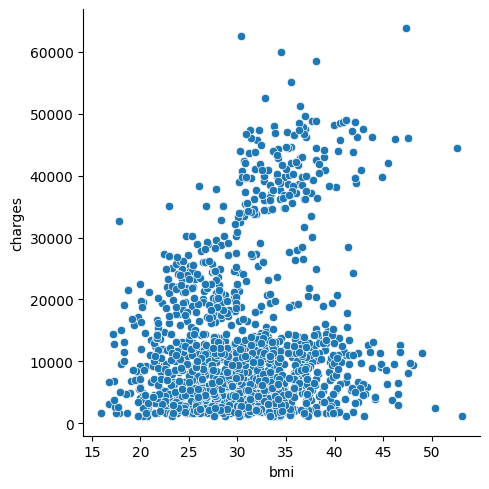

In [14]:
sns.relplot(x='bmi',y='charges',data=df)


<Axes: xlabel='smoker', ylabel='charges'>

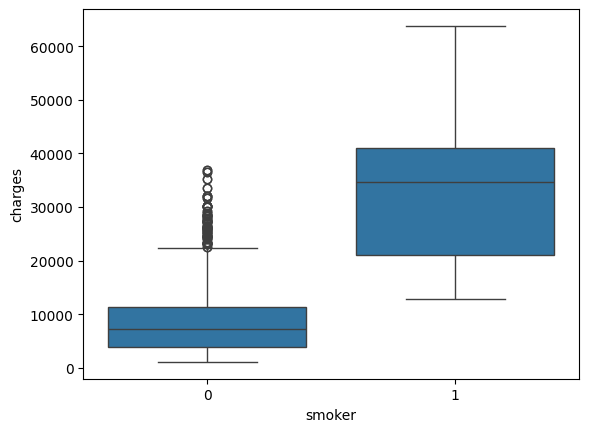

In [15]:
sns.boxplot(x='smoker',y='charges',data=df)


In [16]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.025068,0.112359,0.039364,-0.023031,-0.008551,0.297871
gender,-0.025068,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.112359,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.039364,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023031,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.008551,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.297871,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


Model Development

In [17]:
lre=LinearRegression()

In [18]:
x=df[["smoker"]]
y=df["charges"]
lre.fit(x,y)

LinearRegression()

In [19]:
lre.coef_

array([23805.26542958])

In [20]:
#R^2 score
Rscore=lre.score(x,y)
print(Rscore)

0.6221791733924185


In [28]:
Z=df[["age" ,	"gender",	"bmi" ,"no_of_children" 	,"smoker", 	"region"]]
Y=df['charges']

In [29]:
#R^2 score
lre.fit(Z,Y)

LinearRegression()

In [31]:
lre.coef_

array([  254.49473114,   -59.96191854,   328.82659129,   492.88105361,
       23998.7436969 ,  -323.1033647 ])

In [32]:
print(lre.score(Z,Y))

0.7498349067423146


Model with pipeline

In [27]:
pr= PolynomialFeatures(degree=10)
pr

PolynomialFeatures(degree=10)

In [35]:
Z_pr=pr.fit_transform(Z)

In [36]:
Z_pr.shape

(2772, 8008)

In [39]:
Input=[('Scale',StandardScaler()),('Polynomial',PolynomialFeatures(include_bias=True)),('Model',LinearRegression())]
Pipe=Pipeline(Input)

In [45]:
Pipe


Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures()),
                ('Model', LinearRegression())])

In [41]:
Z=Z.astype('float')

In [43]:
Pipe.fit(Z,Y)

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures()),
                ('Model', LinearRegression())])

In [47]:
ypipe=Pipe.predict(Z)
ypipe[0:4]

array([23800.4296875 ,  2786.328125  ,  5250.11328125,  4569.0234375 ])

In [48]:
print(r2_score(Y,ypipe))

0.844515891749682


Model Evaluation

In [49]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(Z,Y,test_size=0.2, random_state=1)

In [50]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(Xtrain,Ytrain)
yhat = RidgeModel.predict(Xtest)
print(r2_score(Ytest,yhat))

0.6760367379027947


with degree=2

In [58]:
pr = PolynomialFeatures(degree=4)

x_train_pr = pr.fit_transform(Xtrain)
x_test_pr = pr.fit_transform(Xtest)


RidgeModel.fit(x_train_pr, Ytrain)
y_hat = RidgeModel.predict(x_test_pr)


print(r2_score(Ytest,y_hat))



0.7904135430134874


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.19405e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
